# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [85]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


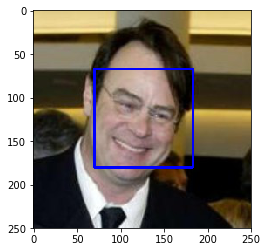

In [86]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [87]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

# returns the percentage of the first 100 images in the dog and human face datasets
# that include a detected, human face.

human_face_images_count = 0
dog_face_images_count = 0

for file in tqdm(human_files_short):
    if face_detector(file):
        human_face_images_count += 1

for file in tqdm(dog_files_short):
    if face_detector(file):
        dog_face_images_count += 1

print("")
print("Question 1: Assess the Human Face Detector")
print("{0:.0%} of human images found faces".format(human_face_images_count / len(human_files_short)))
print("{0:.0%} of dog images found faces".format(dog_face_images_count / len(dog_files_short)))


100%|██████████| 100/100 [01:36<00:00,  3.27it/s]


Question 1: Assess the Human Face Detector
98% of human images found faces
17% of dog images found faces


* The submission returns the percentage of the first 100 images in the dog and human face datasets that include a detected, human face.



We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
# optional answer using haarcascade_frontalface_alt2

face_cascade_2 = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')

def face_detector_2(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade_2.detectMultiScale(gray)
    return len(faces) > 0

human_face2_images_count = 0
dog_face2_images_count = 0

for file in tqdm(human_files_short):
    if face_detector_2(file):
        human_face2_images_count += 1

for file in tqdm(dog_files_short):
    if face_detector_2(file):
        dog_face2_images_count += 1

print("")
print("Question 1 (optional): Assess the Human Face Detector")
print("{0:.0%} of human images found faces".format(human_face2_images_count / len(human_files_short)))
print("{0:.0%} of dog images found faces".format(dog_face2_images_count / len(dog_files_short)))


100%|██████████| 100/100 [01:18<00:00,  3.98it/s]


Question 1: Assess the Human Face Detector
100% of human images found faces
21% of dog images found faces


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [79]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" />

* source: https://neurohive.io/en/popular-networks/vgg16/

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [92]:
from PIL import Image
import torchvision.transforms as transforms

# note VGG mean/stddev normalization
transform = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    VGG16.eval()
    img_data = transform(Image.open(img_path))
    if use_cuda:
        img_data = img_data.cuda()
    img_data = img_data.unsqueeze(0)
    model_output = VGG16(img_data)
    _, preds_tensor = torch.max(model_output, 1)
    return int(preds_tensor)

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [81]:
# NOTE: I initially implemented this on a local clone of the github repo, which did not have the above note
# I spent signficant time figuring out this approach... would have been really useful to have these
# comments in the github repo as well :)

# imagenet_class_index.json downloaded from keras
import json
with open("imagenet_class_index.json") as f:
    imagenet_class_dict = json.load(f)

imagenet_class_index = [None] * len(imagenet_class_dict)
for idx, info in imagenet_class_dict.items():
    imagenet_class_index[int(idx)] = info

In [82]:
# the synset of the whole subtree starting from wnid n02084071 downloaded from
# http://www.image-net.org/api/text/wordnet.structure.hyponym?wnid=n02084071&full=1

dog_wnids = set()

with open("imagenet_dogs.txt") as f:
    for line in f:
        wnid = ''.join(filter(str.isalnum, line)) 
        dog_wnids.add(wnid)

In [83]:
## Step 2: Detect Dogs
# returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = VGG16_predict(img_path)
    wnid = imagenet_class_index[prediction][0]
    
    return wnid in dog_wnids

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [12]:
human_dog_images_count = 0
dog_dog_images_count = 0

for file in tqdm(human_files_short):
    if dog_detector(file):
        human_dog_images_count += 1

for file in tqdm(dog_files_short):
    if dog_detector(file):
        dog_dog_images_count += 1

print("")
print("Question 2: Assess the Dog Detector")
print("{0:.0%} of human images found dogs".format(human_dog_images_count / len(human_files_short)))
print("{0:.0%} of dog images found dogs".format(dog_dog_images_count / len(dog_files_short)))


100%|██████████| 100/100 [02:26<00:00,  1.44s/it]


Question 2: Assess the Dog Detector
0% of human images found dogs
100% of dog images found dogs


* Use a pre-trained VGG16 Net to find the predicted class for a given image.

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [15]:
# Optional answer using ResNet-152 
resnet152 = models.resnet152(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    resnet152 = resnet152.cuda()


def dog_detector_rn152(img_path):
    resnet152.eval()
    img_data = transform(Image.open(img_path))
    img_data = img_data.unsqueeze(0)
    model_output = resnet152(img_data)
    _, preds_tensor = torch.max(model_output, 1)
    pred_idx = int(preds_tensor)
    wnid = imagenet_class_index[pred_idx][0]
    
    return wnid in dog_wnids

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:09<00:00, 25285490.84it/s]


In [16]:
human_dog_images_count_rn152 = 0
dog_dog_images_count_rn152 = 0

for file in tqdm(human_files_short):
    if dog_detector_rn152(file):
        human_dog_images_count_rn152 += 1

for file in tqdm(dog_files_short):
    if dog_detector_rn152(file):
        dog_dog_images_count_rn152 += 1

print("")
print("Question 2 (optional): Assess the Dog Detector")
print("{0:.0%} of human images found dogs".format(human_dog_images_count_rn152 / len(human_files_short)))
print("{0:.0%} of dog images found dogs".format(dog_dog_images_count_rn152 / len(dog_files_short)))


100%|██████████| 100/100 [01:54<00:00,  1.19s/it]


Question 2 (optional): Assess the Dog Detector
0% of human images found dogs
100% of dog images found dogs


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [2]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms

# Write three separate data loaders for the training, validation, and test
# datasets of dog images. These images should be pre-processed to be of the correct size.

normalize = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])


train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       normalize]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      normalize])
# reuse test_transforms for validation

data_dir = '/data/dog_images'
batch_size = 32

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
-  The code resizes and crops the images to the size expected by VGG16 input
- The data set is augmented with random rotations, crops, and flips

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [3]:
classes = os.listdir(data_dir + '/train')
classes.sort()
num_classes = len(classes)
print(num_classes)

133


In [4]:
import sys
use_cuda = torch.cuda.is_available()
print(use_cuda)
if use_cuda:
    dev_props = torch.cuda.get_device_properties(0)
    print(dev_props)

True
_CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [5]:
import subprocess

# source: https://discuss.pytorch.org/t/memory-leaks-in-trans-conv/12492
def get_gpu_memory_map():   
    result = subprocess.check_output(
        [
            'nvidia-smi', '--query-gpu=memory.total,memory.free,memory.used',
            '--format=csv,noheader'
        ])
    
    return result


## Model Architecture

In [81]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),  # (3, 224, 224) -> (16, 224, 224)
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (16, 224, 224) -> (16, 112, 112)
            nn.Conv2d(16, 32, kernel_size=3, padding=1),  # (16, 112, 112) -> (32, 112, 112)
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (32, 112, 112) -> (32, 56, 56)
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # (32, 56, 56) -> (64, 56, 56)
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (64, 56, 56) -> (64, 28, 28)
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  # (64, 28, 28) -> (128, 28, 28)
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (128, 28, 28) -> (128, 14, 14)
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 14 * 14, 1300),
            nn.ReLU(True),
            nn.Dropout(0.25),
            nn.Linear(1300, num_classes),
        )
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 128 * 14 * 14)
        x = self.classifier(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
* I came to this architecture by inspecting Torch's VGG source code and reading papers on the Stanford dog breed dataset classification.
* As seems common in image recognition nets, this CNN uses several layers of doubling depth
* Classification is done with two FC layers
* Question: why are stacked convolutoinal layers of the same size useful? (i.e. in VGG)

In [82]:
print(model_scratch)
from torchsummary import summary  # copied from https://github.com/sksq96/pytorch-summary
summary(model_scratch, (3, 224, 224))


Net(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=1300, bias=True)
    (1): ReLU(inplace)
    (2): Dropout(p=0.25)
    (3): Linear(in_features=1300, out_features=133, bias=True)
  )
)
-------------------------

<img src="scratch.png" />

* generated with https://github.com/waleedka/hiddenlayer

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [83]:
import torch.optim as optim
criterion_scratch = nn.CrossEntropyLoss()
# optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.003)
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [84]:
loaders_scratch = {"train":  trainloader, "test": testloader, "valid": validloader}

In [58]:
# addresses errors in image loading
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

* valid_loss_min set from previous training run (1x20)
* therefore train() can continue with same validation loss threshold from previous run

In [11]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, init_valid_loss_min=np.Inf):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = init_valid_loss_min
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            if (batch_idx + 1) % 10 == 0:
                sys.stdout.write("-")
                sys.stdout.flush()
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
    
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            if (batch_idx + 1) % 10 == 0:
                sys.stdout.write("+")
                sys.stdout.flush()
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
                loss = criterion(output, target)
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print("")
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} => {:.6f})'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        print("")
    # return trained model
    return model

In [ ]:
# clear GPU cache, should see increase in free mem
# print(get_gpu_memory_map())
# torch.cuda.empty_cache()
# print(get_gpu_memory_map())

# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

* As noted in the comment above train(), this model was trained for 40 epochs
* Output not shown since I refactored train() to have init_valid_loss_min param
* I could re-run to show output, but didn't do so here in order to save GPU time
* In general, I think that defining and executing a function should happen in different cells

In [12]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [88]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.821058


Test Accuracy: 13% (114/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [14]:
# reused from the scratch loaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size)
loaders_transfer= {"train":  trainloader, "test": testloader, "valid": validloader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [7]:
import numpy as np
from torch import nn
import torch.nn.functional as F
from torchvision.models import vgg
import torch.utils.model_zoo as model_zoo

class TransferNet(vgg.VGG):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(TransferNet, self).__init__(vgg.make_layers(vgg.cfg['D']))  # sets up vgg16 layers
        
        ## Define layers of a CNN
        
        # load pre-trained vgg16 model parameters
        self.load_state_dict(model_zoo.load_url(vgg.model_urls['vgg16']))
        
        # freeze feature training
        for param in self.features.parameters():
            param.requires_grad = False
        
        # replace final classification layer
        n_inputs = self.classifier[-1].in_features
        self.classifier[-1] = nn.Linear(n_inputs, num_classes)
        
        # normal initialization in final layer, instead of uniform defaults
        y = (1.0/np.sqrt(n_inputs))
        self.classifier[-1].weight.data.normal_(0, y)

model_transfer = TransferNet()

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
* My approach here is to apply transfer learning technique to VGG-16
* Presumably, this is an excellent starting point given the performance of dog_detector()
* The model is subclassed from VGG, instead of modified post-hoc as in the lesson
* I think the subclassing approach is more readable, but relies on implementation details of vgg class
* Final classification layer is replaced with one of appropriate size (133 outputs)
* Weights are initialized from gaussian distribution as per suggestion in lesson 4 

In [9]:
from torchsummary import summary  # copied from https://github.com/sksq96/pytorch-summary

print(model_transfer)
summary(model_transfer, (3, 224, 224))

TransferNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [16]:
criterion_transfer = nn.CrossEntropyLoss()
# Optimizer is defined below, see comments
# optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.003)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

* There are 6 classification parameters (weights and biases for each of the 3 FC layers)
* Given previous performance of this model, preservce the parameters of the first 2 layers

In [101]:
# model_transfer = train(2, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

classifier_parameters = list(model_transfer.classifier.parameters())
classifier_parameters[0].requires_grad = False
classifier_parameters[1].requires_grad = False
classifier_parameters[2].requires_grad = False
classifier_parameters[3].requires_grad = False


for param in model_transfer.classifier.parameters():
    print(param.requires_grad, param.size())
        

False torch.Size([4096, 25088])
False torch.Size([4096])
False torch.Size([4096, 4096])
False torch.Size([4096])
True torch.Size([133, 4096])
True torch.Size([133])


In [110]:
# Don't optimize first 2 FC layers
optimizer_transfer = optim.Adam(filter(lambda p: p.requires_grad, model_transfer.classifier.parameters()), lr=0.003)
model_transfer = train(3, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


--------------------++
Epoch: 1 	Training Loss: 2.393304 	Validation Loss: 0.758242
Validation loss decreased (4.200000 => 0.758242)

--------------------++
Epoch: 2 	Training Loss: 2.139196 	Validation Loss: 0.797351

--------------------++
Epoch: 3 	Training Loss: 2.230448 	Validation Loss: 0.728537
Validation loss decreased (0.758242 => 0.728537)



## Explanation for Above
* As mentioned in Q4 answer, VGG already performs well for dog classification
* In the Transfer Learning lesson, the VGG classification layer is trained but not the features layers
* Assuming the first two FC layers in the classifier are already well trained, it seemed useful to train the final classification layer a few and not backpropogate the error throughout
* Following this, re-enable training on all classification layers

In [116]:
for param in model_transfer.classifier.parameters():
    param.requires_grad = True

optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.003)

In [ ]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
# train the model
model_transfer = train(60, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer_2.pt')

--------------------++
Epoch: 1 	Training Loss: 23.759089 	Validation Loss: 4.894465
Validation loss decreased (inf => 4.894465)

--------------------++
Epoch: 2 	Training Loss: 5.567149 	Validation Loss: 4.888373
Validation loss decreased (4.894465 => 4.888373)

--------------------++
Epoch: 3 	Training Loss: 5.183820 	Validation Loss: 4.881590
Validation loss decreased (4.888373 => 4.881590)

--------------------++
Epoch: 4 	Training Loss: 5.162686 	Validation Loss: 4.883645

--------------------++
Epoch: 5 	Training Loss: 5.232708 	Validation Loss: 4.882955

--------------------++
Epoch: 6 	Training Loss: 5.038608 	Validation Loss: 4.883030

--------------------++
Epoch: 7 	Training Loss: 4.931344 	Validation Loss: 4.883787

--------------------++
Epoch: 8 	Training Loss: 5.129117 	Validation Loss: 4.883843

--------------------++
Epoch: 9 	Training Loss: 5.124568 	Validation Loss: 4.884975

--------------------++
Epoch: 10 	Training Loss: 4.972989 	Validation Loss: 4.884852

------

* Below I evaluate the test performance of the two different VGG transfer trainings
* The first model (model_transfer.pt) is the result of training the final classification layer
* The second model (model_transfer_2.pt) is the result of training all FC classification layers
* The first model is a clear winner. (Although I am concerned that I might have mis-implemented the second model)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [17]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.928939


Test Accuracy: 81% (685/836)


In [18]:
model_transfer.load_state_dict(torch.load('model_transfer_2.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 4.878784


Test Accuracy:  1% (10/836)


### The first model far exceeds the second model and the 60% threshold, so use it going forward

In [20]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [98]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in classes]

def breed_predictions(img_path):
    img_data = transform(Image.open(img_path))
    if use_cuda:
        img_data = img_data.cuda()
    img_data = img_data.unsqueeze(0)
    model_output = model_transfer(img_data)
    return model_output

def predict_breed_transfer(img_path):
    model_output = breed_predictions(img_path)
    _, preds_tensor = torch.max(model_output, 1)
    predicted_class = int(preds_tensor)
    return class_names[predicted_class]

### Modified code from Transfer_Learning_Solution.ipynb to show classification images and output

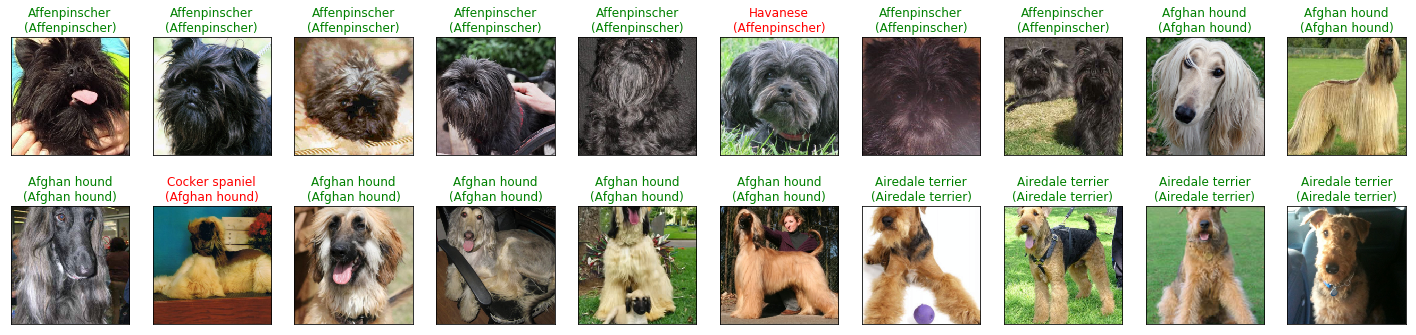

In [46]:
import matplotlib.pyplot as plt

# obtain one batch of test images
dataiter = iter(loaders_transfer['test'])
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if use_cuda:
    images = images.cuda()

# get sample outputs
output = model_transfer(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())

norm_mean = np.array([0.485, 0.456, 0.406])
norm_std = np.array([0.229, 0.224, 0.225])

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
plt.subplots_adjust(top=1.2)
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    image = images_data[idx].transpose((1, 2, 0))
    image = norm_std * image + norm_mean
    image = np.clip(image, 0, 1)
    plt.imshow(image)
    ax.set_title("{}\n({})".format(class_names[preds[idx]], class_names[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

In [73]:
def get_max_probs(loaders, model, use_cuda):
    print(len(test_data))
    max_probs = np.empty(len(test_data) + 1)
    cur_index = 0

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = F.softmax(model(data))
        probs, preds_tensor = torch.max(output, -1)
        for i in probs:
            max_probs[cur_index] = float(i)
            cur_index += 1
    
    return max_probs

In [74]:
max_probs = get_max_probs(loaders_transfer, model_transfer, use_cuda)
print(len(max_probs))
print(max_probs[:10])

836


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


837
[ 0.99988234  0.95368844  0.87263799  0.9999851   0.99594384  0.82549739
  0.98429203  0.88501811  1.          1.        ]


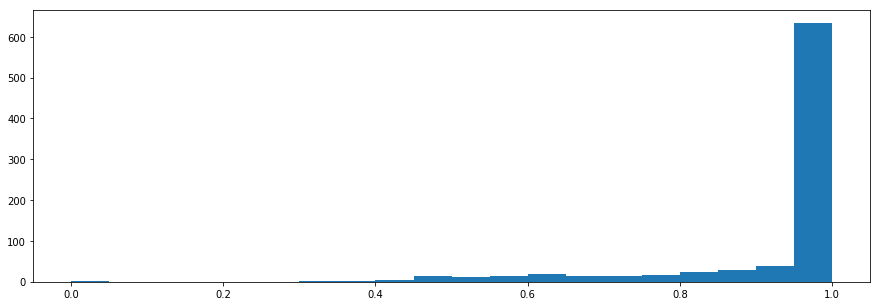

In [78]:
plt.figure(clear=True, figsize=(15, 5))
plt.hist(max_probs, bins=20)
plt.show()

* Above output is an attempt to characterize the confidence of the model
* Seems like a good model, given how many probabilities are >0.9

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [102]:
def imshow(img_path, title="", normalize=True):
    fig, ax = plt.subplots()
    ax.imshow(plt.imread(img_path))
    plt.title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    plt.show()

In [115]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    if dog_detector(img_path):
        breed = predict_breed_transfer(img_path)
        imshow(img_path, "It's a {0} doge!".format(breed))
    elif face_detector(img_path):
        breed = predict_breed_transfer(img_path)
        imshow(img_path, "Meatbag looks like a {0}".format(breed))
    else:
        imshow(img_path, "Neither dog nor human were detected")
    ## handle cases for a human face, dog, and neither
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

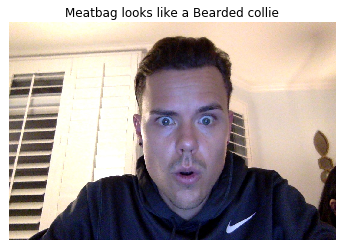

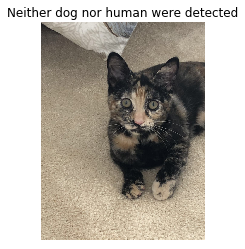

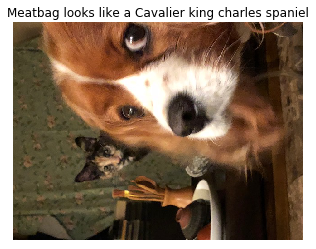

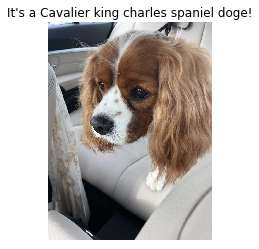

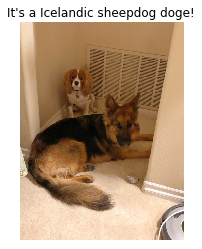

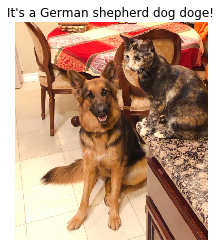

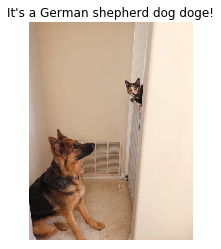

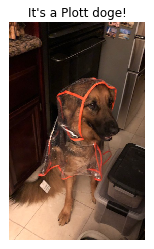

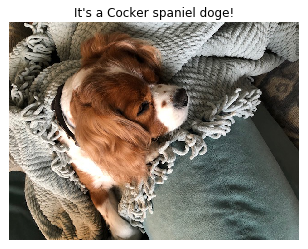

In [116]:
run_app('uploaded/me.jpg')
run_app('uploaded/IMG_2026.JPG')
run_app('uploaded/IMG_2050.JPG')
run_app('uploaded/IMG_2055.JPG')
run_app('uploaded/IMG_2127.JPG')
run_app('uploaded/IMG_2143.JPG')
run_app('uploaded/IMG_2151.JPG')
run_app('uploaded/IMG_2156.JPG')
run_app('uploaded/IMG_2253.jpg')

__Answer:__ (Three possible points for improvement)

### Weaknesses
* The model did not do as well as I had hoped with the uploaded images
* I used photos of my cat Arya and two dogs, Coco the German Shepherd and Cody the Cavalier
* ...although I intentionally chose images that I thought would be challenging (strange angles, multiple animals, raincoat, rotation. And Cody is an atypical Cavalier who is frequently mistaken by humans for a Spaniel)

### Future Improvements
* My from-scratch model only achieved 13% accuracy after 40 epochs of training. Many prominent CNN's use sequential convolutional layers of the same size before pooling. I had hoped to each at least 25% accuracy.
* It seems strange to run two models which are nearly identical (VGG-16 and transfered VGG-16). I would create a transfer model with an additional class (human) and train on human images as well.
* Isolating dog faces in the image before running the classifier model might offer better accuracy and lower compute time. This seems to be a common approach in the literature for this type of problem.
* Isolating dog faces might also provide a path to identifying the species of multiple dogs in a single photo, which seems like an intersting project in its own right!

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)